# Функции решения игры и построения графика

In [ ]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt


def nash_equilibrium(A):

    ## Объявление искомых величин
    strat1 = []
    strat2 = []
    game_val = 0

    ## Объявление коэффициентов для задачи линейного программирования
    borders_1 = []
    borders_2 = []

    coef_1 = []
    coef_2 = []

    ## Количество соответственно строк и столбцов в матрице игры
    game_h = A.shape[0]
    game_w = A.shape[1]

    ## Ищется минимум в матрице, чтобы, при необходимости, сделать матрицу положительной
    matrix_min = np.amin(A)

    if(matrix_min < 0):
        A += abs(matrix_min) + 1
    
    ## Объявление транспонированной матрицы
    A_trans = -np.transpose(A)
    
    borders_1 = -np.ones(game_w)
    coef_1 = np.ones(game_h)
    borders_2 = np.ones(game_h) 
    coef_2 = -np.ones(game_w)
    
    ## Решается задача линейного программирования
    res = linprog(borders_1, A_ub = A, b_ub = coef_1)
    strat_2 = res.get("x")

    res = linprog(borders_2, A_ub = A_trans, b_ub = coef_2)
    strat_1 = res.get("x")

    ## Находится цена игры      
    game_val = 1 / np.sum(strat_1)

    strat_1 *= game_val
    strat_2 *= game_val
    
    if(matrix_min < 0):
        game_val = game_val - matrix_min

    print("1-st player stratagy: ", strat_1)
    print("2-nd player stratagy: ", strat_2)
    print("Game value: ", game_val)
    return strat_1, strat_2, game_val

# Рисование гистограммы
def draw(p, q):
    b1 = []
    for i in range(len(p)):
        b1.append(i)
    fig = plt.figure()
    plt.bar(b1, p)
    plt.title('1-st player\'s stratagy:')
    plt.xlabel('Stratagies')
    plt.ylabel('Probabilities')
    plt.xlim(0,len(p))
    plt.ylim(0, np.max(p) + 1)
    plt.show()
    
    b2 = []
    for i in range(len(q)):
        b2.append(i)

    fig1 = plt.figure()
    plt.bar(b2, q)
    plt.title('2-nd player\'s stratagy:')
    plt.xlabel('Stratagies')
    plt.ylabel('Probabilities')
    plt.xlim(0,len(q))
    plt.ylim(0, np.max(q) + 1)
    plt.show()

# Спектр состоит из одной точки

ONE POINT SPECTRUM:
1-st player stratagy:  [ 0.5  0.5]
2-nd player stratagy:  [ 0.5  0.5]
Game value:  3.0


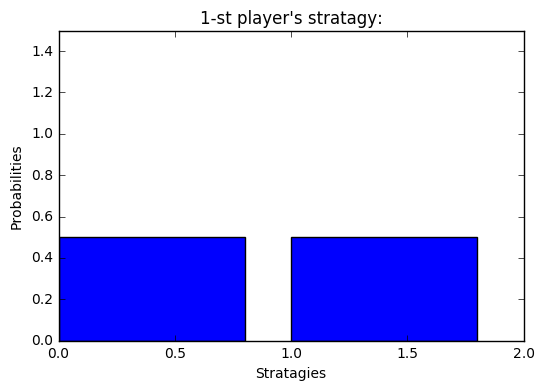

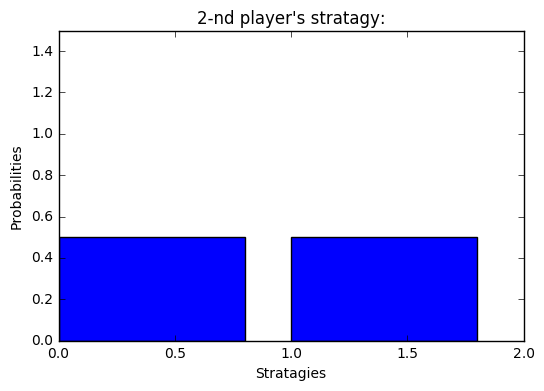

In [33]:
Game = np.array([[-1, 1], [1, -1]])
print('ONE POINT SPECTRUM:')
s1, s2, val = nash_equilibrium(Game)
draw(s1, s2)

# Спектр неполон

SPECTRUM IS NOT FULL:
1-st player stratagy:  [ 0.3125  0.25    0.      0.4375]
2-nd player stratagy:  [ 0.125   0.1875  0.6875]
Game value:  4.625


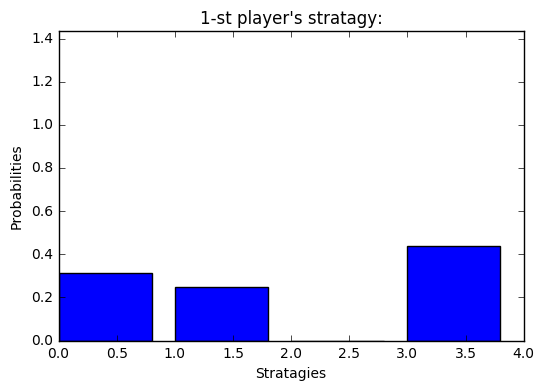

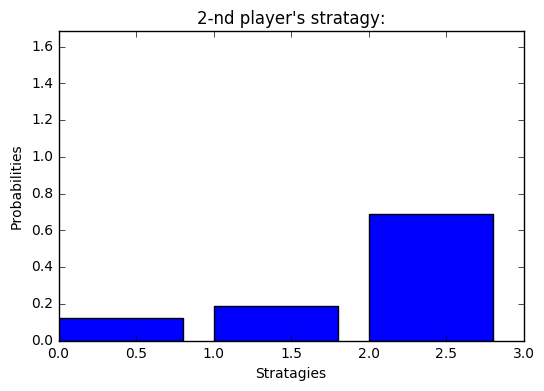

In [34]:
Game = np.array([[4, 0, 6], [3, 8, 4], [1, 2, 6], [6, 6, 4]])
print('SPECTRUM IS NOT FULL:')
s1, s2, val = nash_equilibrium(Game)
draw(s1, s2)

# Спектр полон

SPECTRUM IS FULL:
1-st player stratagy:  [ 0.25  0.25  0.5 ]
2-nd player stratagy:  [ 0.25  0.5   0.25]
Game value:  2.5


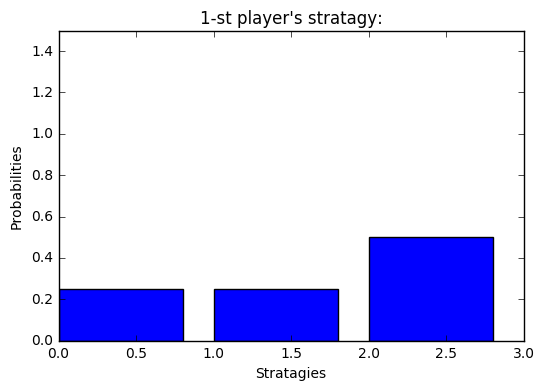

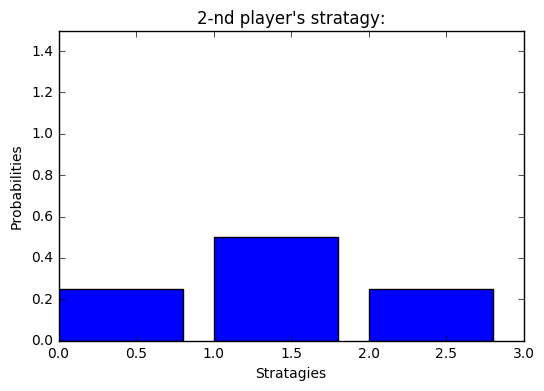

In [31]:
Game = np.array([[3, 1, 5], [1, 3, 3], [3, 3, 1]])
print('SPECTRUM IS FULL:')
s1, s2, val = nash_equilibrium(Game)
draw(s1, s2)

ONE POINT SPECTRUM:
1-st player stratagy:  [ 0.  1.]
2-nd player stratagy:  [ 1.  0.  0.]
Game value:  1.0


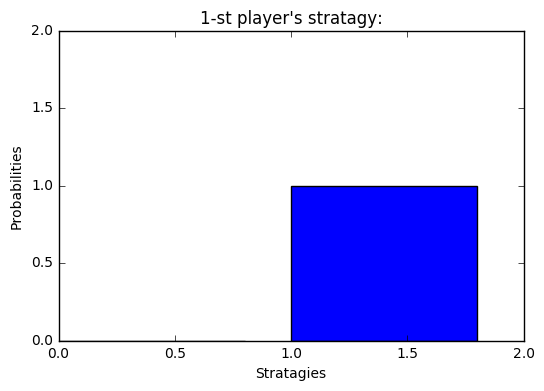

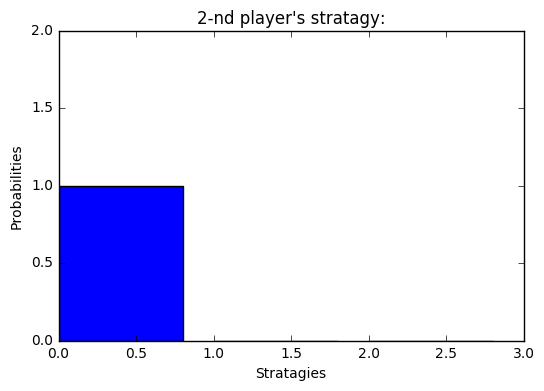

In [32]:
Game = np.array([[0, 1, 1], [1, 1, 1]])
print('SPECTRUM IS FULL:')
s1, s2, val = nash_equilibrium(Game)
draw(s1, s2)